In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split #这里是引用了交叉验证
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.tree import DecisionTreeRegressor#决策树
from sklearn.neighbors import KNeighborsClassifier
plt.rcParams['font.sans-serif'] = ['SimHei']  #配置显示中文，否则乱码
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号，如果是plt画图，则将mlp换成plt

df=pd.read_csv('bj_housing(1)(1).csv')
df=df.sort_values(by='Year')#将数据按年份进行排序q
df=df.reset_index()#根据年份值对数据重新排序
delete=df[df['Year']<1944].index#异常值的索引
df=df.drop(delete,axis=0)#删除异常值
df=df.drop(['index'],axis=1)#删除无用的index列
df

,Area,Value,Room,Living,School,Year,Floor
3,60,135,2,1,1,1944,6
4,87,450,3,1,1,1952,4
5,87,500,3,1,1,1952,4
6,87,500,3,1,1,1952,4
7,87,450,3,1,1,1952,4
...,...,...,...,...,...,...,...
9994,87,180,2,2,1,2014,10
9995,78,180,2,1,1,2014,34
9996,111,705,1,1,0,2014,3
9997,170,730,3,2,1,2015,18


Area      0.741374
Value     1.000000
Room      0.497706
Living    0.402830
School    0.047850
Year      0.168236
Floor     0.127970
Type      0.526262
Name: Value, dtype: float64


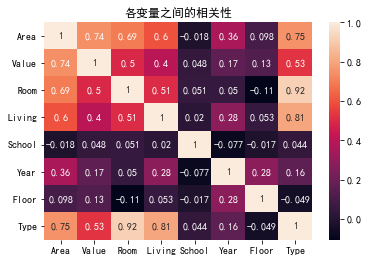

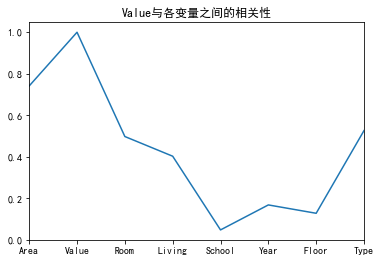

In [141]:
#删除异常值，根据统计的年份来看，1944年以前的数据不具备参考价值
corr=df.corr()
plt.title("各变量之间的相关性")
sns.heatmap(corr, annot=True)
print(corr['Value'])
plt.figure()
plt.title("Value与各变量之间的相关性")
corr['Value'].plot()

In [163]:
a=df.isnull().sum()
for i in a.index:
    if(a[i]!=0):
        df[i].fillna(0)
        print("填充完毕")

In [142]:
df['Type']=df['Room']+df['Living']#Room与Living的相关性相似，可以合并这两列构建一列新的变量
X=df[['Area','Type','Year','Floor']]
y=df['Value']
length=len(X)
X_train=X[:int(length*0.7)]
X_test=X[int(length*0.7):]
y_train=y[:int(length*0.7)]
y_test=y[int(length*0.7):]

In [153]:
def train_model(method,name):

    if(name=='knn'):
        k=[i+1 for i in range(10)]
        train_accuracy={}
        for n_neighbors in k:
            knn=KNeighborsClassifier(n_neighbors)
            knn.fit(X_train,y_train)
            y_predict=knn.predict(X_test)
            train_accuracy[n_neighbors]=knn.score(X_train,y_train)
        arg = max(train_accuracy, key=train_accuracy.get)
        linreg=KNeighborsClassifier(arg)
    else:
        linreg= method
    model=linreg.fit(X_train, y_train)
    y_pred=linreg.predict(X_test)
    plt.figure(figsize=(10,6))
    if name=='knn':
        plt.title(name+"预测结果k=%d"%arg)
    else:
        plt.title(name+"预测结果")
    plt.plot(X_test['Year'].sort_values(),y_test,label='测试值')
    plt.plot(X_test['Year'].sort_values(),y_pred,label='预测值')
    plt.plot(X_train['Year'].sort_values(),y_train,label='训练数据')
    plt.legend()

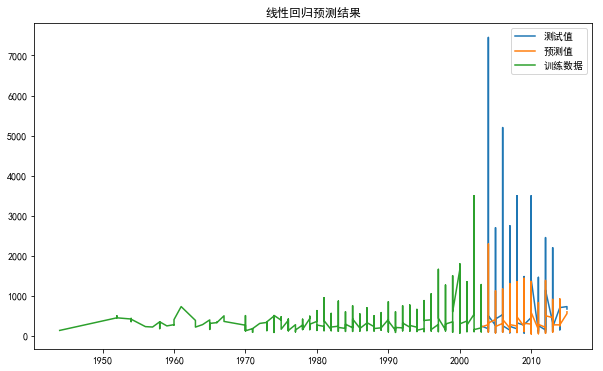

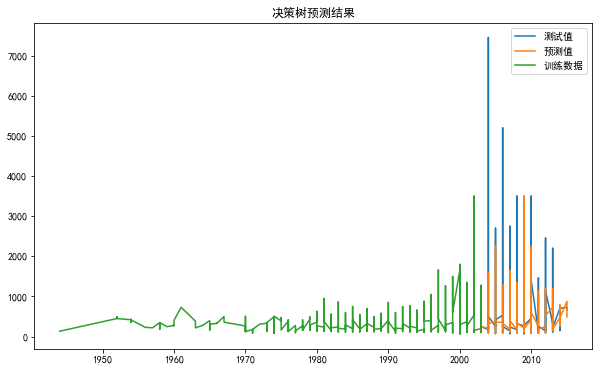

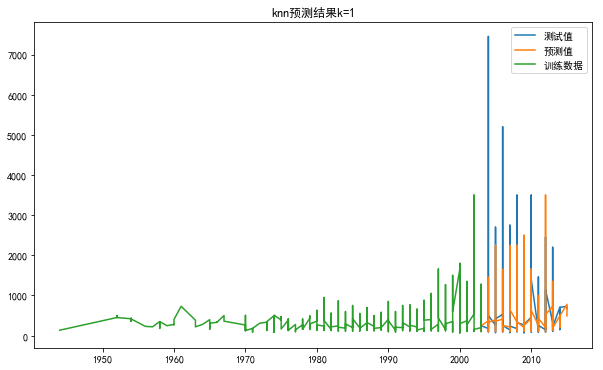

In [154]:
train_model(LinearRegression(),"线性回归")
train_model(DecisionTreeRegressor(),"决策树")
train_model(KNeighborsClassifier(),"knn")